# Machine learning project on Flower Recognition
## CNN: 4-Conv CNN model

In [1]:
# Importing required libraries.
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf 
import os

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import glob

## Applications:
A flower recognition system can have various uses and use cases, both in research and practical applications. Here are some common use cases for a flower recognition system:

   1.**Education:**
   - Educational institutions can integrate flower recognition systems into their botany or biology courses to teach students        about different plant species.
   2.**Agriculture and Farming:**
   - In agriculture, flower recognition can be part of crop management, helping farmers monitor and manage wild plants in their      fields or identify beneficial or harmful wildflowers.
   3.**Image Tagging and Sorting:**
   - Social media platforms, photography applications, or image databases can use flower recognition to automatically tag and       sort images based on their content.




In [3]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

imagePaths = getListOfFiles("category_wise") ## Folder structure: datasets --> sub-folders with labels name
#print(imagePaths)

data = []
lables = []
for image in imagePaths:

    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)

    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    data.append(img)

In [4]:
data = np.array(data)
lables = np.array(lables)

le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101}


In [8]:
(X_train, X_test, Y_train, Y_test ) = train_test_split(data, lables, test_size= 0.2, random_state=12)

In [18]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(None , img_rows, img_cols, 3)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(None , img_rows, img_cols, 3)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(None , img_rows, img_cols, 3)
X_val = X_val.astype('float32')
X_val /= 255

TypeError: 'NoneType' object cannot be interpreted as an integer

In [10]:
# Category Wise flower images data.
# dataset, consisting of 102 flower categories. The flowers chosen to be flower
# commonly occuring in the United Kingdom. Each class consists of between 40 and 258 images.
# Total number of images: 8189
base_dir = r'D:\User Data\Desktop\nishant\Projects\Flower Detection System\category_wise' 
img_size = 224
batch = 64


In [3]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,zoom_range=0.2, horizontal_flip=True, 
                                   validation_split=0.2) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2) 
  
# Create datasets 
train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(img_size, img_size), 
                                                  subset='training',batch_size=batch) 

test_datagen = test_datagen.flow_from_directory(base_dir,target_size=(img_size, img_size), 
                                                subset='validation',batch_size=batch) 

Found 6587 images belonging to 102 classes.
Found 1602 images belonging to 102 classes.


In [14]:
#  modelling starts using a CNN. 
#  4-Conv CNN: 4 Convolutional Layer
model = Sequential() 
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
         activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
         padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 


model.add(Conv2D(filters=64, kernel_size=(3, 3), 
         padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), 
         padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(102, activation="softmax")) 


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

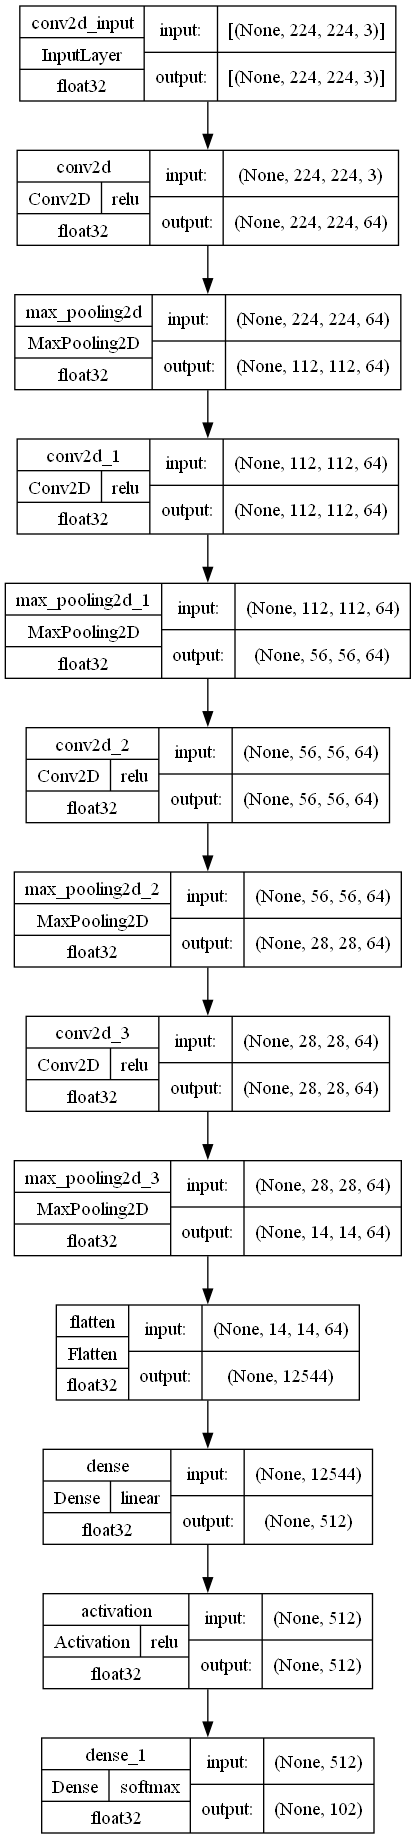

In [6]:
from tensorflow.keras.utils import plot_model
plot_model( 
    model, 
    show_shapes = True, 
    show_dtype = True, 
    show_layer_activations = True
)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
        loss='categorical_crossentropy', metrics=['accuracy']) 


In [8]:
#epochs=30
#model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


In [17]:
score1 = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])


ValueError: in user code:

    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py", line 1850, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 3072)


In [9]:
from tensorflow.keras.models import load_model 
#model.save('Model_CNN4.h5') 
   
# load model 
savedModel=load_model('Model_CNN4.h5')

In [10]:
indices_dict = train_datagen.class_indices
#Creating list for mapping 
list_ = list(indices_dict.keys())
print(list_)

['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange da

In [11]:
from keras.preprocessing import image 

 
def Test(img_path):
    #Input image
    test_image = image.load_img(img_path,target_size=(224,224)) 
    #For show image 
    plt.imshow(test_image) 
    test_image = image.img_to_array(test_image) 
    test_image = np.expand_dims(test_image,axis=0) 
    # Result array 
    result = savedModel.predict(test_image) 
    print(result) 
    #Mapping result array with the main name list 
    i=0
    for i in range(len(result[0])): 
        if(result[0][i]==1): 
            print(list_[i]) 
            break


1/1 [==============================] - 0s 101ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
primula


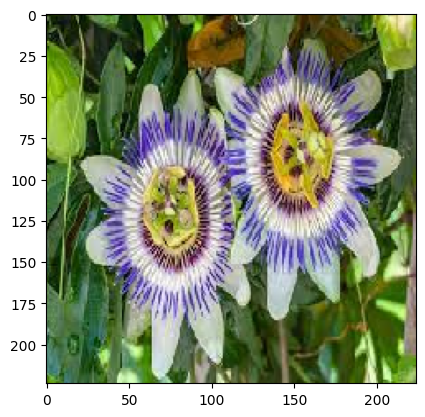

In [14]:
Test("Test Images\img3.jpg")

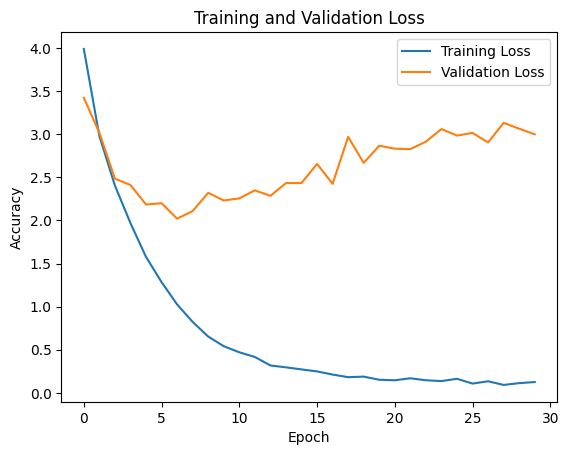

In [4]:
import matplotlib.pyplot as plt 
training_loss = [3.989, 2.9784, 2.4042, 1.9683, 1.577, 1.2844, 1.0255, 0.8228, 0.653, 0.5414, 
                 0.4706, 0.4164, 0.3177, 0.2963, 0.272, 0.2489, 0.2125, 0.182, 0.1886, 0.152, 0.1459, 
                 0.1692, 0.1463, 0.1368, 0.1633, 0.1078, 0.1344, 0.0922, 0.1129, 0.1255]



validation_loss = [3.422, 3.0161, 2.4846, 2.4106, 2.1847, 2.2, 2.0203, 2.1088, 2.3203, 2.2313, 
                   2.2558, 2.3487, 2.2852, 2.4332, 2.4334, 2.6554, 2.4245, 2.9687, 2.6674, 2.8662, 
                   2.832, 2.827, 2.9139, 3.0592, 2.984, 3.0148, 2.9045, 3.1316, 3.0635, 2.9984]

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

epoch = 30
epochs_range = range(epoch)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





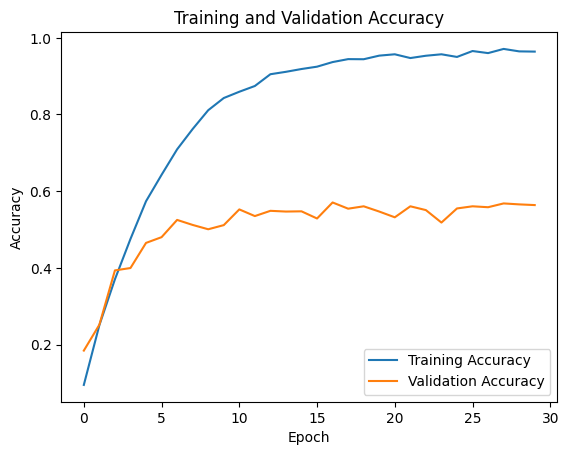

In [21]:
import matplotlib.pyplot as plt 
training_acc = [0.0946,0.2505,0.3701,0.4753,0.5737,0.6426,0.7091,0.7621,0.8111,
               0.8429,0.8593,0.8743,0.9050,0.9113,0.9186,0.9247,0.9367,0.9444,
               0.9441,0.9535,0.9570,0.9472,0.9532,0.9570,0.9501,0.9655,0.9601,0.9710,0.9646,0.9640]



validation_acc = [0.1841,0.2516,0.3933,0.3995,0.4650,0.4800,0.5250,0.5119,0.5006,0.5114,
                  0.5524,0.5350,0.5487,0.5468,0.5474,0.5287,0.5705,0.5543,0.5605,0.5468,
                  0.5318,0.5605,0.5506,0.5181,0.5549,0.5605,0.5581,0.5680,0.5655,0.5637]

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

epoch = 30
epochs_range = range(epoch)
plt.plot(epochs_range, training_acc, label='Training Accuracy')
plt.plot(epochs_range, validation_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [20]:
img_dict = {'passion flower': ['image_00150.jpg'],
 'water lily': ['image_00321.jpg'],
 'cyclamen ': ['image_00461.jpg'],
 'watercress': ['image_00778.jpg'],
 'frangipani': ['image_00846.jpg'],
 'wallflower': ['image_01033.jpg'],
 'rose': ['image_01191.jpg'],
 'petunia': ['image_01459.jpg'],
 'poinsettia': ['image_01551.jpg'],
 'clematis': ['image_01596.jpg'],
 'hibiscus': ['image_01819.jpg'],
 'lotus': ['image_01946.jpg'],
 'anthurium': ['image_02020.jpg'],
 'thorn apple': ['image_02070.jpg'],
 'barbeton daisy': ['image_02283.jpg'],
 'sword lily': ['image_02330.jpg'],
 'morning glory': ['image_02469.jpg'],
 'columbine': ['image_02637.jpg'],
 'geranium': ['image_02727.jpg'],
 'bishop of llandaff': ['image_02802.jpg'],
 'tree mallow': ['image_02880.jpg'],
 'pink-yellow dahlia': ['image_03027.jpg'],
 'bee balm': ['image_03055.jpg'],
 'snapdragon': ['image_03116.jpg'],
 'californian poppy': ['image_03226.jpg'],
 'bird of paradise': ['image_03315.jpg'],
 'fritillary': ['image_03380.jpg'],
 'sweet william': ['image_03461.jpg'],
 'azalea': ['image_03596.jpg'],
 'primula': ['image_03717.jpg'],
 'cape flower': ['image_07293.jpg'],
 'purple coneflower': ['image_03838.jpg'],
 "colt's foot": ['image_04014.jpg'],
 'artichoke': ['image_04131.jpg'],
 'wild pansy': ['image_04211.jpg'],
 'peruvian lily': ['image_04287.jpg'],
 'ruby-lipped cattleya': ['image_04358.jpg'],
 'canna lily': ['image_04428.jpg'],
 'gazania': ['image_04488.jpg'],
 'lenten rose': ['image_04561.jpg'],
 'buttercup': ['image_04653.jpg'],
 'pelargonium': ['image_04760.jpg'],
 'desert-rose': ['image_04791.jpg'],
 'hippeastrum ': ['image_04870.jpg'],
 'giant white arum lily': ['image_04901.jpg'],
 'marigold': ['image_04963.jpg'],
 'orange dahlia': ['image_05023.jpg'],
 'hard-leaved pocket orchid': ['image_05107.jpg'],
 'english marigold': ['image_05166.jpg'],
 'stemless gentian': ['image_05277.jpg'],
 'tree poppy': ['image_05280.jpg'],
 'pincushion flower': ['image_05377.jpg'],
 'sunflower': ['image_05409.jpg'],
 'magnolia': ['image_05511.jpg'],
 'osteospermum': ['image_05525.jpg'],
 'garden phlox': ['image_05605.jpg'],
 'sweet pea': ['image_05635.jpg'],
 'daffodil': ['image_05721.jpg'],
 'king protea': ['image_05750.jpg'],
 'great masterwort': ['image_05814.jpg'],
 'black-eyed susan': ['image_05863.jpg'],
 'bearded iris': ['image_05939.jpg'],
 'windflower': ['image_05963.jpg'],
 'ball moss': ['image_06026.jpg'],
 'spear thistle': ['image_06064.jpg'],
 'silverbush': ['image_06103.jpg'],
 'balloon flower': ['image_06193.jpg'],
 'oxeye daisy': ['image_06211.jpg'],
 'cautleya spicata': ['image_06252.jpg'],
 'common dandelion': ['image_06533.jpg'],
 'yellow iris': ['image_06382.jpg'],
 'monkshood': ['image_06421.jpg'],
 'love in the mist': ['image_06474.jpg'],
 'corn poppy': ['image_06499.jpg'],
 'grape hyacinth': ['image_06583.jpg'],
 'canterbury bells': ['image_06648.jpg'],
 'globe-flower': ['image_06668.jpg'],
 'toad lily': ['image_06713.jpg'],
 'pink primrose': ['image_06740.jpg'],
 'fire lily': ['image_06774.jpg'],
 'red ginger': ['image_08053.jpg'],
 'prince of wales feathers': ['image_06862.jpg'],
 'carnation': ['image_06903.jpg'],
 'mexican aster': ['image_06951.jpg'],
 'alpine sea holly': ['image_06970.jpg'],
 'siam tulip': ['image_07040.jpg'],
 'spring crocus': ['image_07054.jpg'],
 'globe thistle': ['image_07086.jpg'],
 'bolero deep blue': ['image_07140.jpg'],
 'tiger lily': ['image_07167.jpg'],
 'moon orchid': ['image_07214.jpg'],
 'foxglove': ['image_08129.jpg'],
 'bougainvillea': ['image_08156.jpg'],
 'camellia': ['image_07437.jpg'],
 'mallow': ['image_07488.jpg'],
 'mexican petunia': ['image_07623.jpg'],
 'bromelia': ['image_07707.jpg'],
 'blanket flower': ['image_07792.jpg'],
 'trumpet creeper': ['image_07861.jpg'],
 'blackberry lily': ['image_07934.jpg'],
 'gaura': ['image_07970.jpg'],
 'japanese anemone': ['image_08023.jpg']}


In [2]:

list_ = ['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'ball moss', 'balloon flower', 'barbeton daisy', 'bearded iris', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', "colt's foot", 'columbine', 'common dandelion', 'corn poppy', 'cyclamen', 'daffodil', 'desert-rose', 'english marigold', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'japanese anemone', 'king protea', 'lenten rose', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican aster', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange dahlia', 'osteospermum', 'oxeye daisy', 'passion flower', 'pelargonium', 'peruvian lily', 'petunia', 'pincushion flower', 'pink primrose', 'pink-yellow dahlia', 'poinsettia', 'primula', 'prince of wales feathers', 'purple coneflower', 'red ginger', 'rose', 'ruby-lipped cattleya', 'siam tulip', 'silverbush', 'snapdragon', 'spear thistle', 'spring crocus', 'stemless gentian', 'sunflower', 'sweet pea', 'sweet william', 'sword lily', 'thorn apple', 'tiger lily', 'toad lily', 'tree mallow', 'tree poppy', 'trumpet creeper', 'wallflower', 'water lily', 'watercress', 'wild pansy', 'windflower', 'yellow iris']


In [3]:
from tensorflow.keras.models import load_model
model = load_model('Model_CNN4.h5')

In [6]:
# get accuracy:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
Images = list(img_dict.values())
category = list(img_dict.keys())
correct = 0

for i in range(len(Images)):
    img_path =  "Flower Images\\"+Images[i][0]
    test_image = load_img(img_path,target_size=(224,224)) 
    test_image = img_to_array(test_image) 
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    try:
        index = list(result[0]).index(1)
        ans = list_[index]
        if ans==category[i]: correct+=1
    except:
        print(img_path)

1/1 [==============================] - 0s 69ms/step


In [7]:
total = 102
accuracy = (correct/total)*100
print(accuracy)

74.50980392156863


1/1 [==============================] - 0s 56ms/step


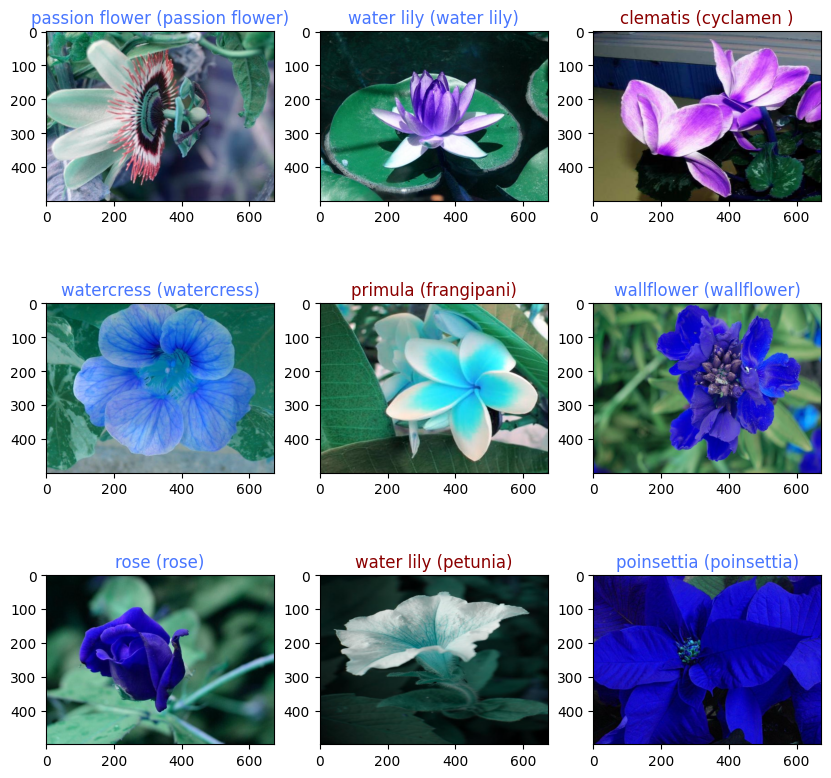

In [17]:
#https://medium.com/ai-techsystems/flower-classification-using-cnn-801e8ba1776
import cv2
import numpy as np
import matplotlib.pyplot as plt
Images = list(img_dict.values())
category = list(img_dict.keys())
from tensorflow.keras.preprocessing.image import load_img, img_to_array
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    img_path = 'Flower Images\\'+Images[i][0]
    Image = cv2.imread(img_path)
    Image = cv2.resize(Image,(673,500))
    test_image = load_img(img_path,target_size=(224,224)) 
    test_image = img_to_array(test_image) 
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    index = list(result[0]).index(1)
    ans = list_[index]
        
    
    ax.imshow(Image)
    
    ax.set_title("{} ({})".format(ans,category[i]),
    color=("#4876ff" if ans == category[i] else "darkred"))